**SIMPLE** **LINEAR** **REGRESSION**

**1.DATA COLLECTION**

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df=sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


**2.UNDERSTANDING THE DATASET**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


total_bill---> X input

tip---> Y output

**3.STATS SUMMARY**

In [4]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


**4.RELATIONSHIP CHECK**

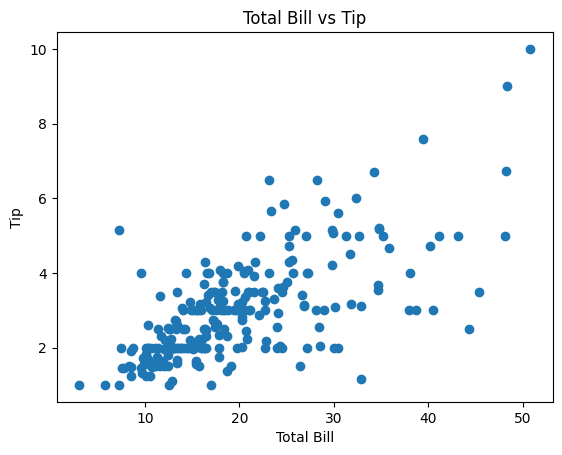

In [5]:
import matplotlib.pyplot as plt
plt.scatter(df["total_bill"],df["tip"])
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Total Bill vs Tip")
plt.show()

OBSERVATIONS :

1.As the bill increases tip increases

2.Relationship = Straight line(we can use linear regression)


**5.FEATURE & TARGET SEPARATION**

In [6]:
x=df[["total_bill"]] #feature input should be in 2D only
y=df["tip"] #feature output 1D

**6.TRAIN-TEST-SPLIT**

(to make model perform well on unseen data)

In [7]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

**7.FEATURE STANDARDIZATION**

1.Compare the coefficients fairly

2.Avoid the dominance of large values

3.Prepare for Ridge/Lasso


In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

NOTE :

1.Fit only on training data

2.Prevents the data leakage

**8.TRAIN LINEAR REGRESSION MODEL**

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
model=LinearRegression()
model.fit(x_train_scaled,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [12]:
print("Coefficient : ",model.coef_[0])
print("Intercept : ",model.intercept_)

Coefficient :  0.9357171400271826
Intercept :  3.0877948717948724


In [13]:
y_pred=model.predict(x_test_scaled)

**9.MODEL EVALUATION**

In [14]:
from sklearn.metrics import r2_score

In [15]:
r2=r2_score(y_test,y_pred)
print("R2 score : ",r2)

R2 score :  0.5449381659234664


In [16]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [17]:
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("MSE : ",mse)
print("RMSE : ",rmse)

MSE :  0.5688142529229538
RMSE :  0.7541977545199626


**10.VISUALIZE THE BEST FIT LINE**

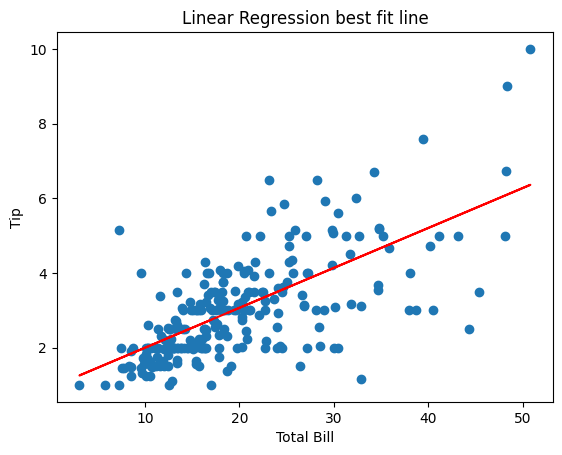

In [18]:
plt.scatter(x,y)
plt.plot(x,model.predict(scaler.transform(x)),color="red")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Linear Regression best fit line")
plt.show()

**11.INPUT-OUTPUT REAL TIME**

In [22]:
bill_amount=float(input("Enter bill amount : "))
bill_df = pd.DataFrame([[bill_amount]], columns=["total_bill"])
bill_scaled = scaler.transform(bill_df)
tip_amount=model.predict(bill_scaled)
print(f"For bill amount {bill_amount}, Predicted Tip amount :{tip_amount[0] : .2f}")

For bill amount 500.0, Predicted Tip amount : 54.41
